In [7]:
from linkage_utils import batch_random_generator, sort_mech, solve_rev_vectorized_batch_wds
import torch
import numpy as np
import wandb

In [6]:
target_pc = np.array([[90, 33], [61, 6], [30, 0], [110, 20], [71, 38], [125, 18], [29, 41], [0, 14], [0, 23], [41, 42], [64, 7], [65, 8], [38, 0], [78, 36], [101, 19], [101, 28], [110, 24], [102, 20], [41, 1], [75, 12], [2, 27], [44, 42], [3, 10], [3, 28], [68, 8], [15, 2], [98, 18], [121, 20], [71, 10], [90, 32], [11, 4], [2, 13], [72, 10], [45, 2], [74, 38], [22, 0], [32, 41], [67, 8], [97, 30], [59, 40], [113, 20], [82, 14], [112, 24], [81, 36], [75, 11], [108, 26], [2, 26], [117, 22], [86, 16], [78, 12], [35, 41], [16, 37], [86, 34], [67, 39], [79, 13], [47, 42], [36, 42], [17, 38], [9, 34], [123, 19], [52, 4], [33, 0], [54, 41], [20, 39], [93, 32], [2, 12], [74, 37], [13, 36], [89, 16], [55, 41], [48, 2], [104, 28], [6, 32], [62, 40], [93, 18], [105, 20], [116, 20], [25, 0], [108, 25], [23, 39], [86, 15], [88, 34], [24, 40], [119, 21], [5, 8], [69, 38], [9, 33], [115, 23], [39, 42], [20, 38], [108, 20], [2, 11], [4, 30], [1, 24], [99, 29], [55, 4], [36, 0], [57, 41], [92, 17], [77, 37], [5, 30], [8, 32], [104, 27], [30, 41], [13, 3], [88, 33], [65, 40], [119, 20], [28, 0], [9, 5], [50, 42], [62, 7], [27, 40], [115, 22], [20, 1], [95, 31], [72, 38], [4, 29], [1, 14], [99, 19], [58, 5], [111, 20], [80, 14], [77, 36], [39, 0], [0, 18], [73, 11], [42, 42], [106, 26], [84, 35], [96, 18], [76, 12], [69, 9], [42, 1], [62, 6], [0, 22], [31, 0], [122, 20], [52, 41], [43, 1], [4, 28], [118, 22], [16, 2], [1, 13], [68, 39], [79, 36], [80, 13], [18, 38], [102, 19], [102, 28], [0, 17], [60, 40], [11, 35], [103, 20], [114, 20], [23, 0], [33, 41], [84, 34], [45, 42], [14, 36], [49, 3], [121, 19], [7, 6], [113, 24], [15, 37], [82, 36], [91, 32], [0, 21], [122, 19], [12, 4], [106, 20], [10, 34], [87, 16], [4, 9], [46, 2], [37, 42], [18, 1], [90, 17], [98, 30], [83, 14], [21, 39], [0, 16], [75, 37], [84, 15], [2, 25], [56, 5], [22, 39], [49, 2], [26, 0], [113, 23], [82, 35], [48, 42], [63, 40], [52, 3], [94, 18], [124, 19], [53, 4], [34, 0], [25, 40], [14, 3], [120, 21], [89, 33], [70, 38], [90, 16], [6, 31], [40, 42], [64, 8], [56, 4], [37, 0], [117, 20], [109, 25], [59, 6], [40, 1], [6, 8], [60, 6], [124, 18], [10, 5], [51, 42], [14, 2], [97, 18], [109, 20], [120, 20], [70, 10], [100, 29], [28, 40], [63, 7], [58, 41], [21, 1], [44, 2], [73, 38], [105, 27], [66, 8], [31, 41], [43, 42], [111, 24], [29, 0], [80, 36], [6, 7], [10, 4], [116, 22], [85, 34], [51, 41], [66, 39], [78, 13], [16, 38], [100, 19], [58, 40], [112, 20], [21, 0], [81, 14], [74, 11], [12, 36], [107, 26], [47, 2], [77, 12], [61, 40], [104, 20], [115, 20], [32, 0], [85, 15], [87, 34], [23, 40], [53, 41], [118, 21], [96, 30], [17, 2], [92, 32], [69, 39], [19, 38], [103, 28], [12, 35], [35, 0], [24, 0], [56, 41], [34, 41], [1, 25], [76, 37], [46, 42], [50, 3], [7, 32], [8, 6], [0, 20], [8, 33], [114, 23], [12, 3], [4, 8], [51, 3], [64, 40], [107, 20], [118, 20], [88, 16], [49, 42], [38, 42], [26, 40], [19, 1], [91, 17], [0, 15], [94, 31], [0, 24], [54, 4], [84, 14], [57, 5], [27, 0], [110, 25], [8, 5], [0, 19], [83, 35], [95, 18], [106, 27], [68, 9], [98, 19]])/300
target_pc = torch.tensor(target_pc, dtype=float)

In [8]:
NODE_COUNT = 6
TIMESTEPS=2000
BATCH_SIZE = 10000

mechanisms = batch_random_generator(BATCH_SIZE, N_min=NODE_COUNT, N_max=NODE_COUNT, show_progress=True, strategy='srand')


  0%|          | 0/10000 [00:00<?, ?it/s]

In [3]:
# For clarity, convert the mechanisms into labeled data
mechanisms_dict = [{"C_mat": mechanism[0], "X0": mechanism[1], "fixed_nodes": mechanism[2], "motor": mechanism[3]} for mechanism in mechanisms]

# Sort the mechanisms
mechanism_sorted = [sort_mech(A=mech["C_mat"],x0=mech["X0"], motor=mech["motor"], fixed_nodes=mech["fixed_nodes"]) for mech in mechanisms_dict]

# Convert the sorted mechanisms into dicts for clarity
mechanism_sorted_dict = [ {"C_mat": sorted_mech[0], "X0": sorted_mech[1], "fixed_nodes": sorted_mech[2],"sorted_order": sorted_mech[3]} for sorted_mech in mechanism_sorted]

# Get the connectivity mats
C_mats = torch.stack([torch.tensor(mech["C_mat"],dtype=bool) for mech in mechanism_sorted_dict])

# Get the initial positions
X0 = torch.stack([torch.tensor(mech["X0"], dtype=float) for mech in mechanism_sorted_dict])

# Get the indices of fixed nodes
fixed_node_inds = [ torch.tensor(mech["fixed_nodes"], dtype=int) for mech in mechanism_sorted_dict ]

# Get the Assign the fixed node indices
node_types = torch.zeros(size=(BATCH_SIZE, NODE_COUNT, 1), dtype=bool)
for i,inds in enumerate(fixed_node_inds):
    node_types[i,inds,0] = True

# Generate theta
thetas = torch.Tensor(np.linspace(0,np.pi*2,TIMESTEPS+1)[0:TIMESTEPS])

# Solve
sol, cos = solve_rev_vectorized_batch_wds(As=C_mats, x0s=X0, node_types=node_types, thetas=thetas)



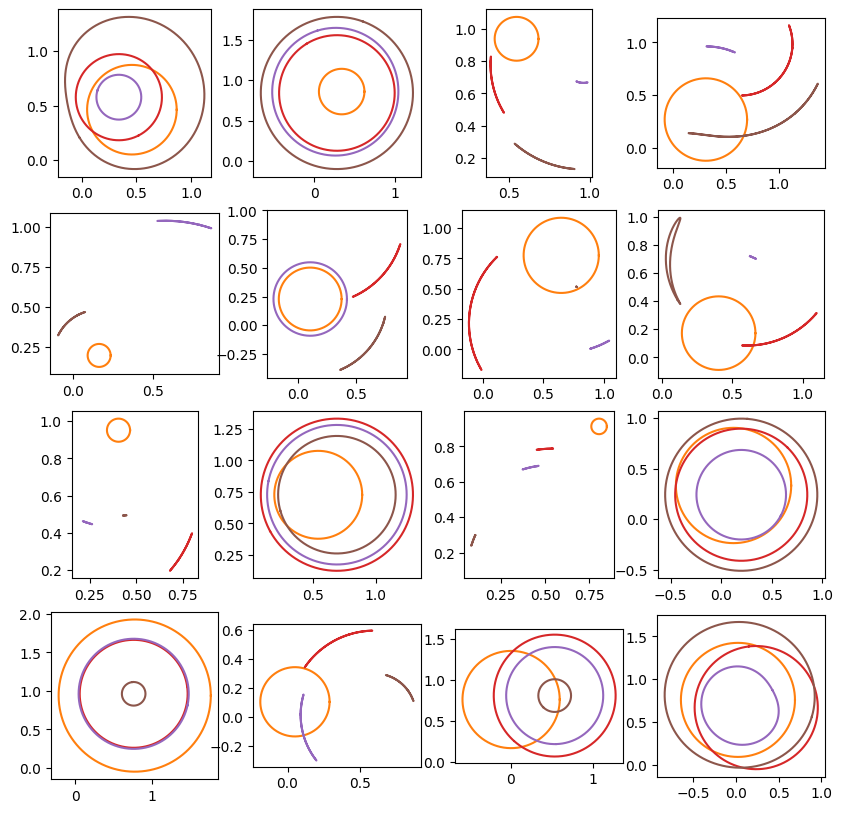

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
plotn = 4
fig, axs = plt.subplots(plotn, plotn, figsize=(10,10))
plt.figure()
for row in range(4):
    for col in range(4):
        for i in range(NODE_COUNT):
            data = sol[row*4+ col]
            axs[row,col].plot(data[i,:,0], data[i,:,1])
            axs[row,col].set_aspect("equal")